In [33]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
from scipy.spatial.distance import euclidean
from sklearn.cluster import KMeans
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

In [2]:
np.random.seed(0)
mean = 0
variance = 2
x = np.random.normal(mean, variance ** 0.5)
y = np.random.normal(mean, variance ** 0.5)
print(f"The x coordinate of a randomly thrown dart is {x:.2f}")
print(f"The y coordinate of a randomly thrown dart is {y:.2f}")


The x coordinate of a randomly thrown dart is 2.49
The y coordinate of a randomly thrown dart is 0.57


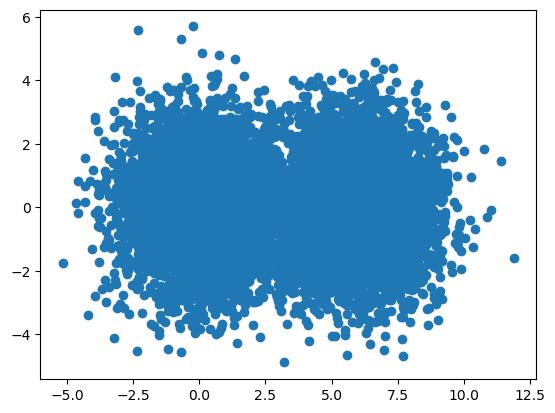

In [3]:
np.random.seed(1)
bulls_eye1 = [0, 0]
bulls_eye2 = [6, 0]
bulls_eyes = [bulls_eye1, bulls_eye2]
x_coordinates, y_coordinates = [], []
for bulls_eye in bulls_eyes:
    for _ in range(5000):
        x = np.random.normal(bulls_eye[0], variance ** 0.5)
        y = np.random.normal(bulls_eye[1], variance ** 0.5)
        x_coordinates.append(x)
        y_coordinates.append(y)
plt.scatter(x_coordinates, y_coordinates)
plt.show()

In [6]:
def nearest_bulls_eye(dart):
    distances = [euclidean(dart, bulls_e) for bulls_e in bulls_eyes] 
    return np.argmin(distances)

darts = [[0,1], [6, 1]]
for dart in darts:
    index = nearest_bulls_eye(dart)
    print(f"The dart at position {dart} is closest to bulls-eye {index}")


The dart at position [0, 1] is closest to bulls-eye 0
The dart at position [6, 1] is closest to bulls-eye 1


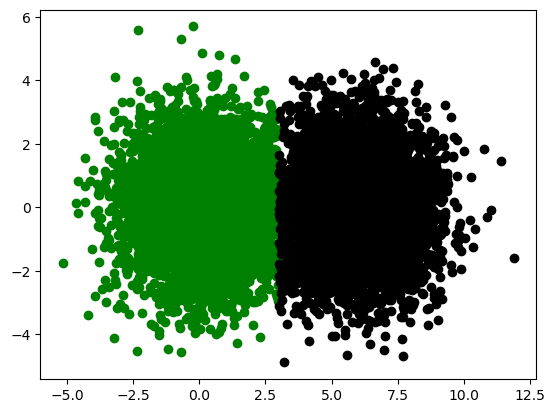

In [8]:
def color_by_cluster(darts):
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts)) if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        plt.scatter(x_coordinates, y_coordinates, color = ['g','k'] [bs_index])
    plt.show()
    
darts = [[x_coordinates[i], y_coordinates[i]] for i in range(len(x_coordinates))] 
color_by_cluster(darts)

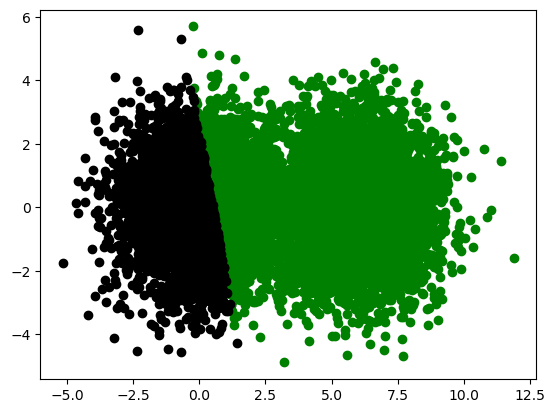

In [9]:
bulls_eyes = np.array(darts[:2])
color_by_cluster(darts)

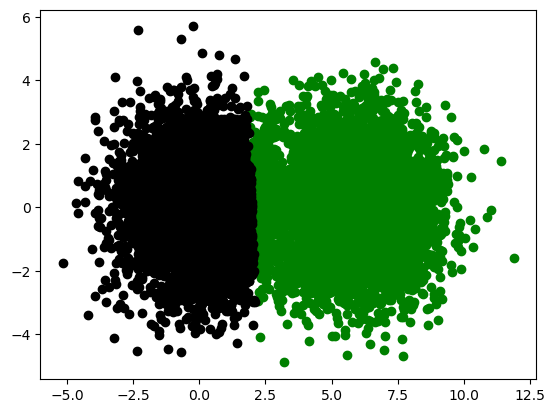

In [10]:
def update_bulls_eyes(darts):
    updated_bulls_eyes = []
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts] 
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts)) if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T 
        mean_center = [np.mean(x_coordinates), np.mean(y_coordinates)] 
        updated_bulls_eyes.append(mean_center)
    return updated_bulls_eyes

bulls_eyes = update_bulls_eyes(darts)
color_by_cluster(darts)

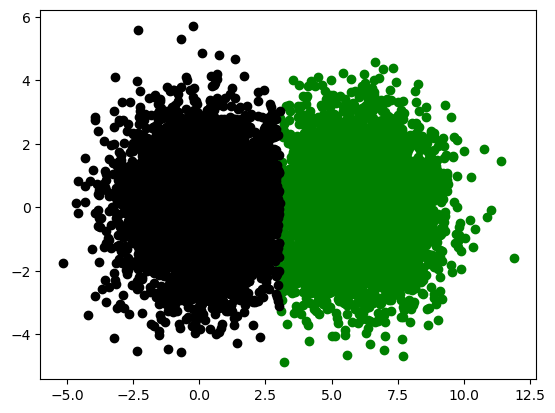

In [11]:
for i in range(10):
    bulls_eyes = update_bulls_eyes(darts)
color_by_cluster(darts)

In [14]:
cluster_model = KMeans(n_clusters=2) 
assigned_bulls_eyes = cluster_model.fit_predict(darts)
print("Bull's-eye assignments:")
print(assigned_bulls_eyes)

Bull's-eye assignments:
[0 0 0 ... 1 1 1]


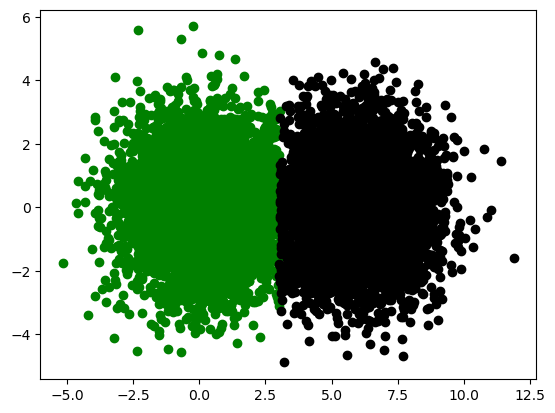

In [17]:
for bs_index in range(len(bulls_eyes)):
    selected_darts = [darts[i] for i in range(len(darts)) if bs_index == assigned_bulls_eyes[i]]
    x_coordinates, y_coordinates = np.array(selected_darts).T 
    plt.scatter(x_coordinates, y_coordinates, color=['g', 'k'][bs_index])
plt.show()

In [18]:
new_darts = [[500, 500], [-500, -500]] 
new_bulls_eye_assignments = cluster_model.predict(new_darts) 
for i, dart in enumerate(new_darts):
    bulls_eye_index = new_bulls_eye_assignments[i]
    print(f"Dart at {dart} is closest to bull's-eye {bulls_eye_index}")

Dart at [500, 500] is closest to bull's-eye 1
Dart at [-500, -500] is closest to bull's-eye 0


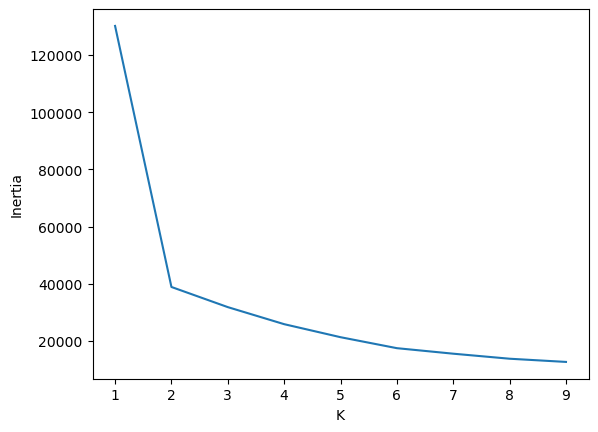

In [20]:
# elbow method
k_values = range(1, 10)
inertia_values = [KMeans(k).fit(darts).inertia_ for k in k_values]
plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [21]:
new_bulls_eye = [12, 0]
for _ in range(5000):
    x = np.random.normal(new_bulls_eye[0], variance ** 0.5)
    y = np.random.normal(new_bulls_eye[1], variance ** 0.5)
    darts.append([x, y])
inertia_values = [KMeans(k).fit(darts).inertia_ for k in k_values]

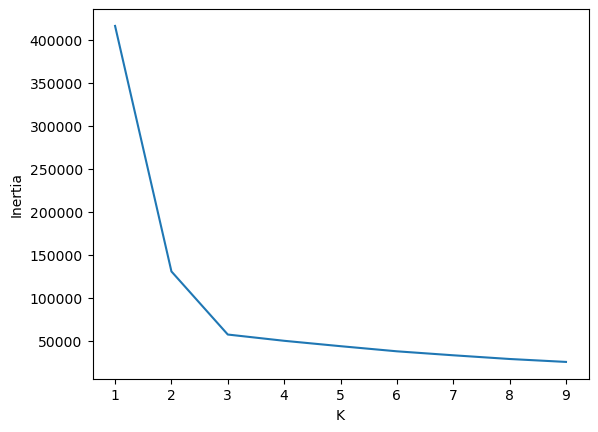

In [22]:
plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

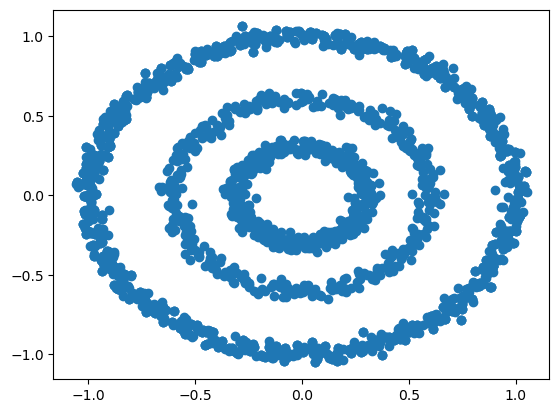

In [25]:
x_coordinates = []
y_coordinates = []
for factor in [.3, .6, 0.99]:
    rock_ring, _ = make_circles(n_samples=800, factor=factor, noise=.03, random_state=1)
    for rock in rock_ring:
        x_coordinates.append(rock[0])
        y_coordinates.append(rock[1])
plt.scatter(x_coordinates, y_coordinates)
plt.show()

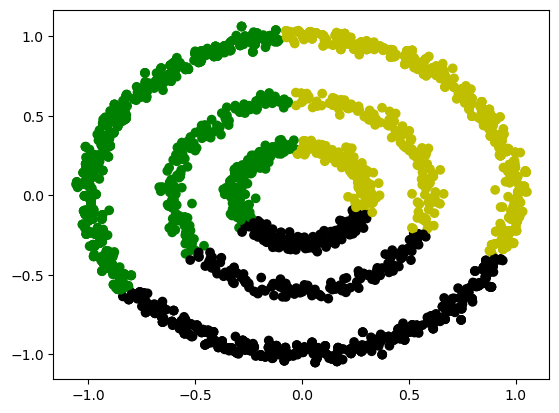

In [26]:
rocks = [[x_coordinates[i], y_coordinates[i]] for i in range(len(x_coordinates))]
rock_clusters = KMeans(3).fit_predict(rocks)
colors = [['g', 'y', 'k'][cluster] for cluster in rock_clusters] 
plt.scatter(x_coordinates, y_coordinates, color=colors) 
plt.show()

In [27]:
# density parameters
epsilon = 0.1
min_points = 10

In [28]:
neighbor_indices = [i for i, rock in enumerate(rocks[1:])
if euclidean(rocks[0], rock) <= epsilon]

In [29]:
num_neighbors = len(neighbor_indices)
print(f"The rock at index 0 has {num_neighbors} neighbors.")
if num_neighbors >= min_points:
    print("It lies in a dense region.")
else:
    print("It does not lie in a dense region.")

The rock at index 0 has 40 neighbors.
It lies in a dense region.


In [30]:
dense_region_indices = [0] + neighbor_indices
dense_region_cluster = [rocks[i] for i in dense_region_indices] 
dense_cluster_size = len(dense_region_cluster)
print(f"We found a dense cluster containing {dense_cluster_size} rocks")


We found a dense cluster containing 41 rocks


In [32]:
dense_region_indices = set(dense_region_indices)
for index in neighbor_indices:
    point = rocks[index]
    neighbors_of_neighbors = [i for i, rock in enumerate(rocks) if euclidean(point, rock) <= epsilon]
    if len(neighbors_of_neighbors) >= min_points:
        dense_region_indices.update(neighbors_of_neighbors)
dense_region_cluster = [rocks[i] for i in dense_region_indices] 
dense_cluster_size = len(dense_region_cluster)
print(f"We expanded our cluster to include {dense_cluster_size} rocks")

We expanded our cluster to include 781 rocks


#### DBSCAN

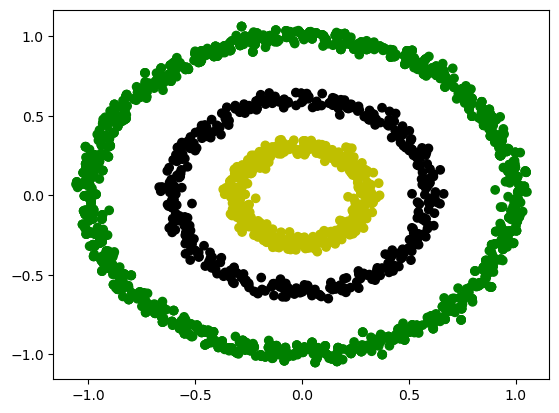

In [34]:
cluster_model = DBSCAN(eps=epsilon, min_samples=min_points) 
rock_clusters = cluster_model.fit_predict(rocks)
colors = [['g', 'y', 'k'][cluster] for cluster in rock_clusters] 
plt.scatter(x_coordinates, y_coordinates, color=colors) 
plt.show()

In [35]:
# finding outliers using DBSCAN

In [37]:
noisy_data = rocks + [[1000, -1000]]
clusters = DBSCAN(eps=epsilon,
min_samples=min_points).fit_predict(noisy_data) 
assert clusters[-1] == -1

In [38]:
def manhattan_distance(point_a, point_b):
    num_blocks = np.sum(np.absolute(point_a - point_b))
    return 0.17 * num_blocks
x = np.array([34, 5])
y = np.array([57, 8])
distance = manhattan_distance(x, y)
print(f"Manhattan distance is {distance} miles")


Manhattan distance is 4.42 miles


Point at index 0 is in cluster 0
Point at index 1 is in cluster 0
Point at index 2 is in cluster 0
Point at index 3 is an outlier
Point at index 4 is an outlier


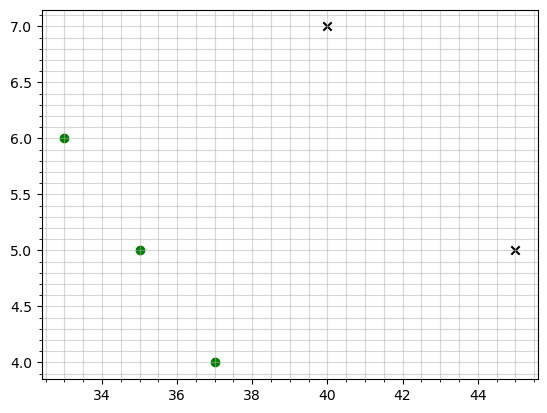

In [40]:
# clustering  using manhattan diostance
points = [[35, 5], [33, 6], [37, 4], [40, 7], [45, 5]]
clusters = DBSCAN(eps=1, min_samples=3, metric=manhattan_distance).fit_predict(points)
for i, cluster in enumerate(clusters):
    point = points[i]
    if cluster == -1:
        print(f"Point at index {i} is an outlier")
        plt.scatter(point[0], point[1], marker='x', color='k') 
    else:
        print(f"Point at index {i} is in cluster {cluster}")
        plt.scatter(point[0], point[1], color='g')
plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()
plt.show()

In [41]:
def ridiculous_measure(point_a, point_b):
    is_negative_a = np.array(point_a) < 0
    is_negative_b = np.array(point_b) < 0
    if is_negative_a.all() and is_negative_b.all():
        return 0
    elif is_negative_a.any() or is_negative_b.any():
        return 10
    else:
        return 2
points = [[-1, -1], [-10, -10], [-1000, -13435], [3,5], [5,-7]]
clusters = DBSCAN(eps=.1, min_samples=2, metric=ridiculous_measure).fit_predict(points)
for i, cluster in enumerate(clusters):
    point = points[i]
    if cluster == -1:
        print(f"{point} is an outlier")
    else:
        print(f"{point} falls in cluster {cluster}")

[-1, -1] falls in cluster 0
[-10, -10] falls in cluster 0
[-1000, -13435] falls in cluster 0
[3, 5] is an outlier
[5, -7] is an outlier


#### Clusters in Pandas

In [42]:
x_coordinates, y_coordinates = np.array(rocks).T
df = pd.DataFrame({'X': x_coordinates, 'Y': y_coordinates, 'Cluster': rock_clusters})

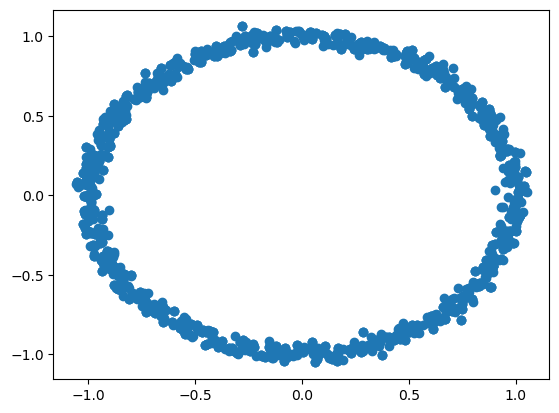

In [43]:
df_cluster = df[df.Cluster == 0]
plt.scatter(df_cluster.X, df_cluster.Y)
plt.show()

Skipping over cluster 0
Plotting cluster 1
Plotting cluster 2


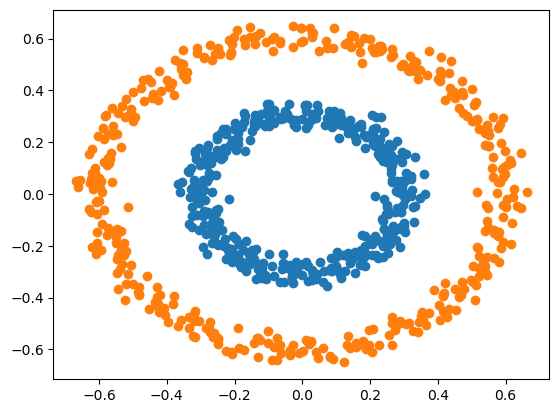

In [44]:
for cluster_id, df_cluster in df.groupby('Cluster'):
    if cluster_id == 0:
        print(f"Skipping over cluster {cluster_id}")
        continue
    print(f"Plotting cluster {cluster_id}")
    plt.scatter(df_cluster.X, df_cluster.Y)
plt.show()

### Geographic location analysis

In [45]:
from math import cos, sin, asin

In [46]:
def great_circle_distance(x1, y1, x2, y2):
    delta_x, delta_y = x2 - x1, y2 - y1
    haversin = sin(delta_x / 2) ** 2 + np.product([cos(x1), cos(x2), sin(delta_y / 2) ** 2])
    return 2 * asin(haversin ** 0.5)


In [47]:
from math import pi
distance = great_circle_distance(0, 0, 0, pi)
print(f"The distance equals {distance} units")

The distance equals 3.141592653589793 units


In [48]:
latitude_north, longitude_north = (90.0, 0)
latitude_south, longitude_south = (-90.0, 0)

In [49]:
to_radians = np.radians([latitude_north, longitude_north, latitude_south, longitude_south])

In [50]:
distance = great_circle_distance(*to_radians.tolist())
print(f"The unit-circle distance between poles equals {distance} units")

The unit-circle distance between poles equals 3.141592653589793 units


In [51]:
earth_distance = 3956 * distance
print(f"The distance between poles equals {earth_distance} miles")

The distance between poles equals 12428.14053760122 miles


In [52]:
def travel_distance(lat1, lon1, lat2, lon2):
    to_radians = np.radians([lat1, lon1, lat2, lon2])
    return 3956 * great_circle_distance(*to_radians.tolist())


In [54]:
import cartopy

In [55]:
from cartopy.crs import PlateCarree

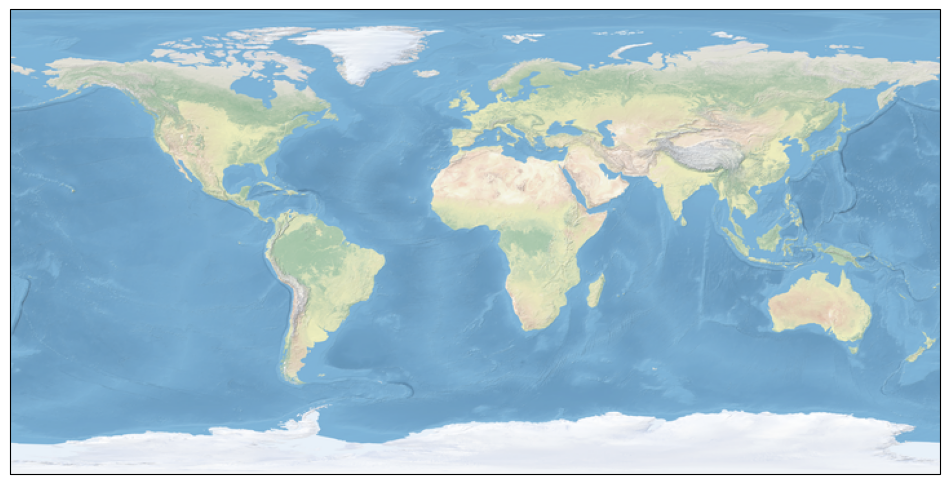

In [59]:
# plt.axes(projection=PlateCarree()).coastlines() 
# plt.show()

# plt.figure(figsize=(12, 8)) 
# plt.axes(projection=PlateCarree()).coastlines() 
# plt.show()

fig = plt.figure(figsize=(12, 8))
plt.axes(projection=PlateCarree()).stock_img()
plt.show()

/Users/rochakbaveja/opt/anaconda3/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


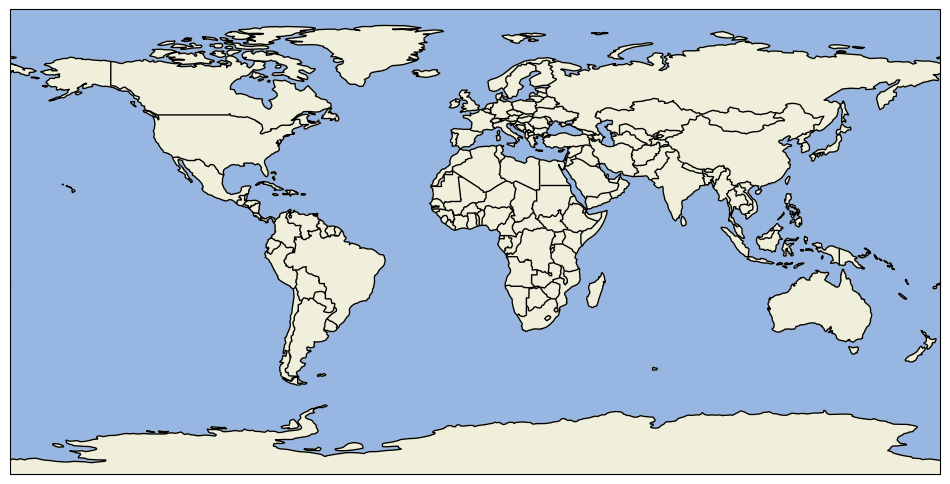

In [63]:
# plt.figure(figsize=(12, 8))
# ax = plt.axes(projection=PlateCarree())
# ax.coastlines()
# ax.stock_img()
# plt.show()

# plt.figure(figsize=(12, 8))
# ax = plt.axes(projection=PlateCarree())
# ax.coastlines()
# ax.add_feature(cartopy.feature.OCEAN)
# ax.add_feature(cartopy.feature.LAND)
# plt.show()

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)
plt.show()

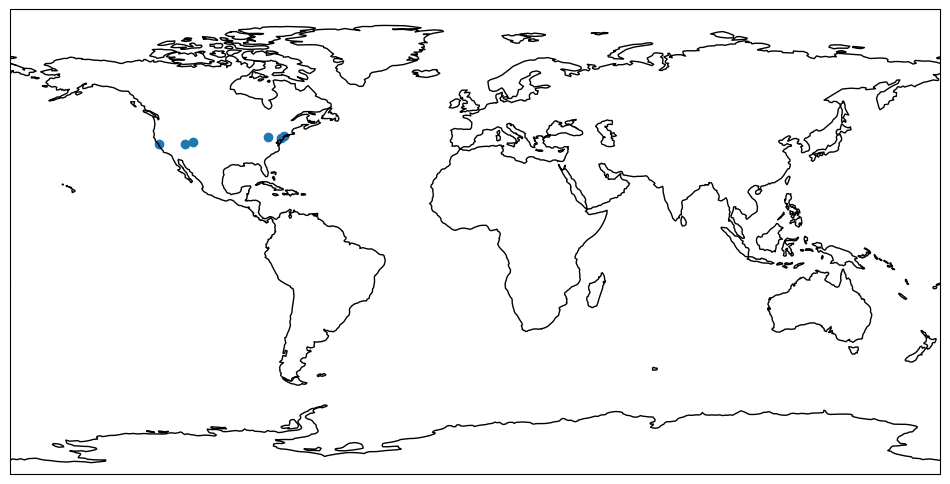

In [64]:
plt.figure(figsize=(12, 8))
coordinates = [(39.9526, -75.1652), (37.7749, -122.4194),
               (40.4406, -79.9959), (38.6807, -108.9769),
               (37.8716, -112.2727), (40.7831, -73.9712)]
latitudes, longitudes = np.array(coordinates).T
ax = plt.axes(projection=PlateCarree())
ax.scatter(longitudes, latitudes)
ax.set_global()
ax.coastlines()
plt.show()

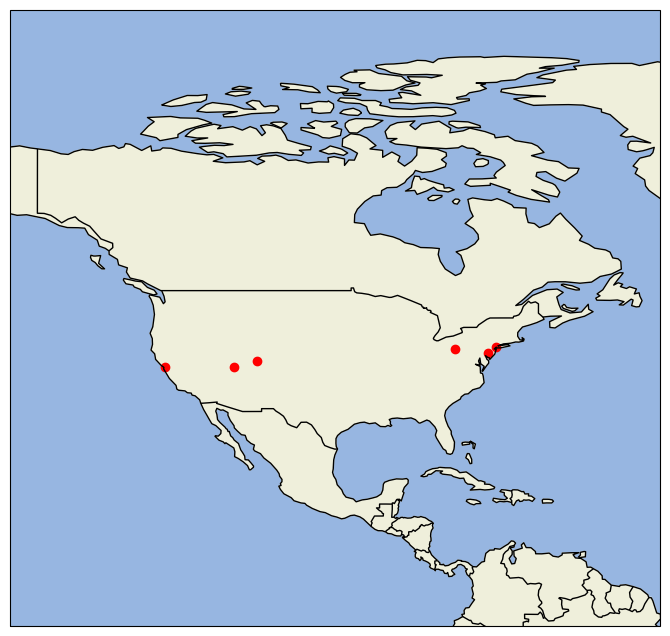

In [65]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())
north_america_extent = (-145, -50, 0, 90)
ax.set_extent(north_america_extent)
ax.scatter(longitudes, latitudes, color='r')
def add_map_features():
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.LAND)
add_map_features()
plt.show()

/Users/rochakbaveja/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/rochakbaveja/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/rochakbaveja/opt/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/Users/rochakbaveja/opt/anaconda3/lib/py

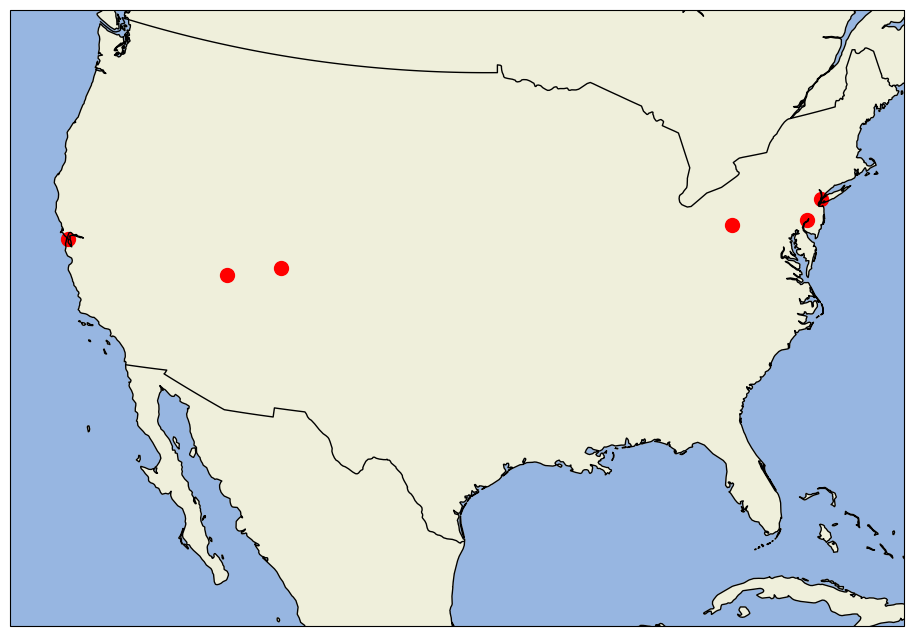

In [66]:
from cartopy.crs import LambertConformal
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=LambertConformal())
us_extent = (-120, -75, 20, 50)
ax.set_extent(us_extent)
ax.scatter(longitudes, latitudes, color='r', transform=PlateCarree(),s=100)
add_map_features()
plt.show()

/Users/rochakbaveja/opt/anaconda3/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


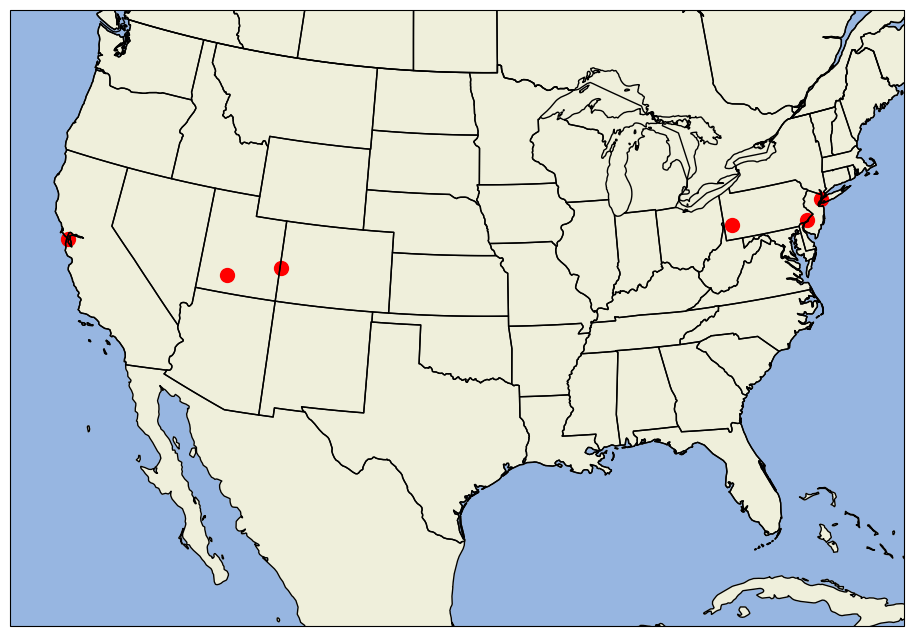

In [67]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=LambertConformal())
ax.set_extent(us_extent)
ax.scatter(longitudes, latitudes, color='r', transform=PlateCarree(),s=100)
ax.add_feature(cartopy.feature.STATES)
add_map_features()
plt.show()

In [69]:
from geonamescache import GeonamesCache
gc = GeonamesCache()

In [70]:
continents = gc.get_continents()
print(continents.keys())

dict_keys(['AF', 'AS', 'EU', 'NA', 'OC', 'SA', 'AN'])


In [71]:
north_america = continents['NA']
print(north_america.keys())

dict_keys(['lng', 'geonameId', 'timezone', 'bbox', 'toponymName', 'asciiName', 'astergdem', 'fcl', 'population', 'wikipediaURL', 'adminName5', 'srtm3', 'adminName4', 'adminName3', 'alternateNames', 'cc2', 'adminName2', 'name', 'fclName', 'fcodeName', 'adminName1', 'lat', 'fcode', 'continentCode'])


In [72]:
for name_key in ['name', 'asciiName', 'toponymName']:
    print(north_america[name_key])

North America
North America
North America


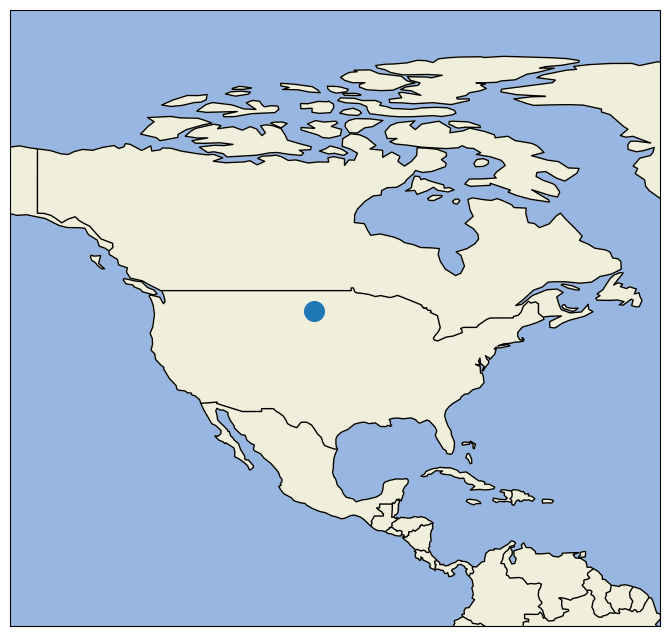

In [73]:
latitude = float(north_america['lat'])
longitude = float(north_america['lng'])
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())
ax.set_extent(north_america_extent)
ax.scatter([longitude], [latitude], s=200)
add_map_features()
plt.show()

In [74]:
countries = gc.get_countries()
num_countries = len(countries)
print(f"GeonamesCache holds data for {num_countries} countries.")
us_data = countries['US']
print("The following data pertains to the United States:")
print(us_data)

GeonamesCache holds data for 252 countries.
The following data pertains to the United States:
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 310232863, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}


In [75]:
us_neighbors = us_data['neighbours']
for neighbor_code in us_neighbors.split(','):
    print(countries[neighbor_code]['name'])

Canada
Mexico
Cuba


In [77]:
result = gc.get_countries_by_names()['United States'] 
assert result == countries['US']


In [79]:
# cities = gc.get_cities()
# num_cities = len(cities)
# print(f"GeoNamesCache holds data for {num_cities} total cities") 
# city_id = list(cities.keys())[0]
# print(cities[city_id])

GeoNamesCache holds data for 25881 total cities
{'geonameid': 3040051, 'name': 'les Escaldes', 'latitude': 42.50729, 'longitude': 1.53414, 'countrycode': 'AD', 'population': 15853, 'timezone': 'Europe/Andorra', 'admin1code': '08', 'alternatenames': ["Ehskal'des-Ehndzhordani", 'Escaldes', 'Escaldes-Engordany', 'Les Escaldes', 'esukarudesu=engorudani jiao qu', 'lai sai si ka er de-en ge er da', 'Эскальдес-Энджордани', 'エスカルデス＝エンゴルダニ教区', '萊塞斯卡爾德-恩戈爾達', '萊塞斯卡爾德－恩戈爾達']}


In [80]:
us_cities = [city for city in cities.values() if city['countrycode'] == 'US']
num_us_cities = len(us_cities)
print(f"GeoNamesCache holds data for {num_us_cities} US cities.")

GeoNamesCache holds data for 3265 US cities.


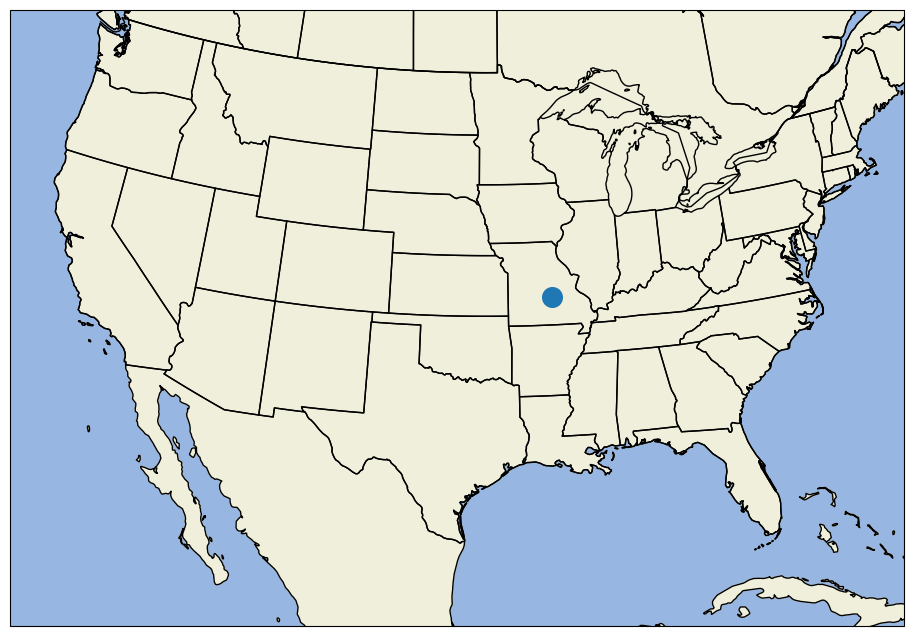

In [82]:
center_lat = np.mean([city['latitude']
                      for city in us_cities])
center_lon = np.mean([city['longitude']
                       for city in us_cities])
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=LambertConformal())
ax.set_extent(us_extent)
ax.scatter([center_lon], [center_lat], transform=PlateCarree(), s=200) 
ax.add_feature(cartopy.feature.STATES)
add_map_features()
plt.show()

In [83]:
matched_cities_by_name = gc.get_cities_by_name('Philadelphia') 
print(matched_cities_by_name)

[{'4560349': {'geonameid': 4560349, 'name': 'Philadelphia', 'latitude': 39.95238, 'longitude': -75.16362, 'countrycode': 'US', 'population': 1603797, 'timezone': 'America/New_York', 'admin1code': 'PA', 'alternatenames': ['Coaquannock', 'Fi-sang', 'Fi-sàng', "Filadehl'fija", "Filadel'fi", "Filadel'fij", "Filadel'fija", 'Filadelfi', 'Filadelfia', 'Filadelfiae', 'Filadelfie', 'Filadelfii', 'Filadelfija', 'Filadelfijo', 'Filadelfio', 'Filadelfiya', 'Filadelfiye', 'Filadelfiä', 'Filadèlfia', 'Filadélfia', 'Filadélfiye', 'Ga-na-ta-jen-go-na', 'PHL', 'Phila', 'Philadelpheia', 'Philadelphia', 'Philadelphie', 'Philly', 'Quequenakee', 'Tsi wahswen:to Tekahso:ken', 'Tsi wahswèn:to Tekahsó:ken', 'fei cheng', 'fi la delfeiy', "filadailafi'a", 'firaderufia', 'flaڈylfya', 'fyladlfya', 'fyladlfya  pnsylwanya', 'philadelaphiya', 'philadelphiya', 'piladelpia', 'pilatelpiya', 'pilladelpia', 'pyldlpyh', 'Φιλαδέλφεια', 'Филаделфиа', 'Филаделфия', 'Филаделфија', 'Филадельфи', 'Филадельфий', 'Филадельфия', '

In [85]:
matched_cities_list = gc.get_cities_by_name('San Francisco')
for i, san_francisco in enumerate(matched_cities_list):
    city_info = list(san_francisco.values())[0]
    country_code = city_info['countrycode']
    country = countries[country_code]['name']
    print(f"The San Francisco at index {i} is located in {country}")

The San Francisco at index 0 is located in Argentina
The San Francisco at index 1 is located in Costa Rica
The San Francisco at index 2 is located in Philippines
The San Francisco at index 3 is located in Philippines
The San Francisco at index 4 is located in El Salvador
The San Francisco at index 5 is located in United States


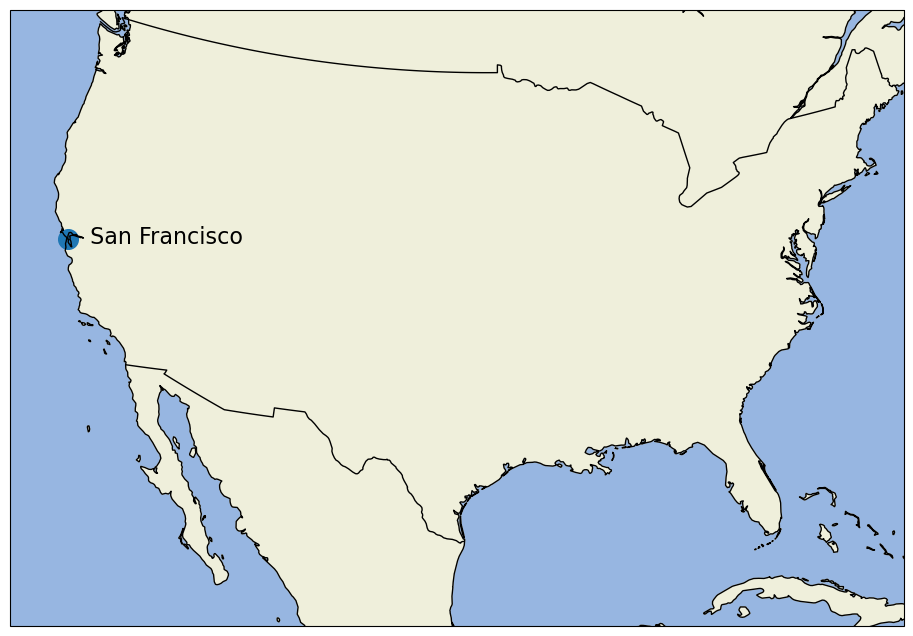

In [86]:
best_sf = max(gc.get_cities_by_name('San Francisco'), key=lambda x: list(x.values())[0]['population'])
sf_data = list(best_sf.values())[0]
sf_lat = sf_data['latitude']
sf_lon = sf_data['longitude']
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=LambertConformal()) 
ax.set_extent(us_extent)
ax.scatter(sf_lon, sf_lat, transform=PlateCarree(), s=200) 
add_map_features()
ax.text(sf_lon + 1, sf_lat, ' San Francisco', fontsize=16,transform=PlateCarree())
plt.show()

In [87]:
for ny_name in ['New York', 'New York City']:
    if not gc.get_cities_by_name(ny_name):
        print(f"'{ny_name}' is not present in the GeoNamesCache database") 
    else:
        print(f"'{ny_name}' is present in the GeoNamesCache database")

'New York' is not present in the GeoNamesCache database
'New York City' is present in the GeoNamesCache database


In [88]:
print(gc.get_cities_by_name(u'Cañon City'))
print(gc.get_cities_by_name(u'Hagåtña'))


[{'5416005': {'geonameid': 5416005, 'name': 'Cañon City', 'latitude': 38.44098, 'longitude': -105.24245, 'countrycode': 'US', 'population': 16400, 'timezone': 'America/Denver', 'admin1code': 'CO', 'alternatenames': ['CNE', 'Canon City', 'Canyon City', 'Cañon City', 'East Canon', 'Kanon Siti', 'Kanono siti', 'Keniun Siti', 'kann syty  klradw', 'kanwn syty', 'kyanana siti', 'Каноно сити', 'Кањон Сити', 'Кениън Сити', 'كانون سيتي', 'کانن سیتی، کلرادو', 'کینن سٹی، کولوراڈو', 'क्यानन सिटी']}}]
[{'4044012': {'geonameid': 4044012, 'name': 'Hagåtña', 'latitude': 13.47567, 'longitude': 144.74886, 'countrycode': 'GU', 'population': 1051, 'timezone': 'Pacific/Guam', 'admin1code': 'AN', 'alternatenames': ['Agadna', 'Agana', 'Agana -1998', 'Agania', 'Aganija', 'Aganja', 'Agano', 'Agaña', 'Aguana', 'Akashi', 'Akashi - JP renamed WW2', 'Ankana', 'City of Ignacio de Agana', 'City of Saint Ignacio de Agana', 'Ciudad de San Ignacio de Agana', 'Hagadna', 'Hagatna', 'Hagåtña', 'Haqatna', 'Jagatna', 'Khaga

In [90]:
from unidecode import unidecode
accented_names = [city['name'] for city in gc.get_cities().values() if city['name'] != unidecode(city['name'])]
num_accented_cities = len(accented_names)
print(f"An example accented city name is '{accented_names[0]}'") 
print(f"{num_accented_cities} cities have accented names")


An example accented city name is 'Khawr Fakkān'
4964 cities have accented names


In [91]:
alternative_names = {unidecode(name): name for name in accented_names}
print(gc.get_cities_by_name(alternative_names['Hagatna']))

[{'4044012': {'geonameid': 4044012, 'name': 'Hagåtña', 'latitude': 13.47567, 'longitude': 144.74886, 'countrycode': 'GU', 'population': 1051, 'timezone': 'Pacific/Guam', 'admin1code': 'AN', 'alternatenames': ['Agadna', 'Agana', 'Agana -1998', 'Agania', 'Aganija', 'Aganja', 'Agano', 'Agaña', 'Aguana', 'Akashi', 'Akashi - JP renamed WW2', 'Ankana', 'City of Ignacio de Agana', 'City of Saint Ignacio de Agana', 'Ciudad de San Ignacio de Agana', 'Hagadna', 'Hagatna', 'Hagåtña', 'Haqatna', 'Jagatna', 'Khagatna', 'San Ignacio de Agana *', "Ville d'Agana", "Vjoska Agan'ja", 'a jia ni ya', 'akatna', 'ha katya', 'hagania', 'hagasnya', 'hagatna', 'hagatnya', 'haghatnya', "hegatn'ya", 'Αγκάνα', 'Вёска Аганья', 'Хагатна', 'Хагатња', 'Հագատնա', 'هاغاتنيا', 'هاگاتنا', 'هاگاتنیا', 'हेगात्न्या', 'அகாத்ன', 'ฮากาตญา', 'ჰაგატნა', 'ハガニア', '阿加尼亚', '하갓냐']}}]


In [92]:
text = 'This sentence matches Hagatna'
for key, value in alternative_names.items():
    if key in text:
        print(gc.get_cities_by_name(value))
        break

[{'4044012': {'geonameid': 4044012, 'name': 'Hagåtña', 'latitude': 13.47567, 'longitude': 144.74886, 'countrycode': 'GU', 'population': 1051, 'timezone': 'Pacific/Guam', 'admin1code': 'AN', 'alternatenames': ['Agadna', 'Agana', 'Agana -1998', 'Agania', 'Aganija', 'Aganja', 'Agano', 'Agaña', 'Aguana', 'Akashi', 'Akashi - JP renamed WW2', 'Ankana', 'City of Ignacio de Agana', 'City of Saint Ignacio de Agana', 'Ciudad de San Ignacio de Agana', 'Hagadna', 'Hagatna', 'Hagåtña', 'Haqatna', 'Jagatna', 'Khagatna', 'San Ignacio de Agana *', "Ville d'Agana", "Vjoska Agan'ja", 'a jia ni ya', 'akatna', 'ha katya', 'hagania', 'hagasnya', 'hagatna', 'hagatnya', 'haghatnya', "hegatn'ya", 'Αγκάνα', 'Вёска Аганья', 'Хагатна', 'Хагатња', 'Հագատնա', 'هاغاتنيا', 'هاگاتنا', 'هاگاتنیا', 'हेगात्न्या', 'அகாத்ன', 'ฮากาตญา', 'ჰაგატნა', 'ハガニア', '阿加尼亚', '하갓냐']}}]


In [94]:
assert 'Boston' in 'Boston Marathon'
assert 'Boston Marathon'.startswith('Boston')
assert 'Boston Marathon'.endswith('Boston') == False
assert 'in a' in 'sin apple'
assert 'in a' in 'win attached'

### regex

In [95]:
import re

In [98]:
regex = 'Boston'
random_text = 'Clown Patty'
match = re.search(regex, random_text)
assert match is None

In [99]:
matchable_text = 'Boston Marathon'
match = re.search(regex, matchable_text)
assert match is not None
start, end = match.start(), match.end()
matched_string = matchable_text[start: end]
assert matched_string == 'Boston'

In [101]:
for text in ['BOSTON', 'boston', 'BoSTOn']:
    assert re.search(regex, text, flags=re.IGNORECASE) is not None

In [102]:
for regex in ['\\bin a\\b', r'\bin a\b']:
    for text in ['sin apple', 'win attached']:
        assert re.search(regex, text) is None
    text = 'Match in a string'
    assert re.search(regex, text) is not None


In [103]:
regex = r'I visited \b(Boston|Philadelphia|San Francisco)\b yesterday.' 
assert re.search(regex, 'I visited Chicago yesterday.') is None
cities = ['Boston', 'Philadelphia', 'San Francisco']
for city in cities:
    assert re.search(regex, f'I visited {city} yesterday.') is not None


In [104]:
compiled_re = re.compile(regex)
text = 'I visited Boston yesterday.'
for i in range(1000):
    assert compiled_re.search(text) is not None